# <span style="color:blue; font-size:16;">SGF Super Demo SASPy and SAS_Kernel</span>

## Important links
Repo: https://github.com/sassoftware/saspy
        
Doc: https://sassoftware.github.io/saspy/index.html
        
Examples: https://github.com/sassoftware/saspy-examples
        

# This is a Python kernel; type in python code ...

In [1]:
import sys
sys.path

['',
 'C:\\ProgramData\\Anaconda3\\python36.zip',
 'C:\\ProgramData\\Anaconda3\\DLLs',
 'C:\\ProgramData\\Anaconda3\\lib',
 'C:\\ProgramData\\Anaconda3',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Sphinx-1.5.1-py3.6.egg',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\setuptools-27.2.0-py3.6.egg',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\sastpw\\.ipython']

# Import the saspy module to get access to SAS 
## Instantiate a SASsession object. This creates the SAS session that will be used for this notebook
### Then submit the SASsession object to get info about your session

In [2]:
import saspy
sas = saspy.SASsession(results='html')  # I like HTML ODS output for tables instead of Pandas
sas

Using SAS Config named: winlocal
SAS Connection established. Subprocess id is 25640



Access Method         = IOM
SAS Config name       = winlocal
WORK Path             = C:\Users\sastpw\AppData\Local\Temp\SAS Temporary Files\_TD2884_d10a626_\Prc2\
SAS Version           = 9.04.01M5P09132017
SASPy Version         = 2.4.4
Teach me SAS          = False
Batch                 = False
Results               = html
SAS Session Encoding  = wlatin1
Python Encoding value = cp1252
SAS process Pid value = 2884


### Instantiate another SASsession object. This creates a second SAS session we are connected to
### And see that this is a different process, and different WORK library

In [3]:
sas2 = saspy.SASsession()  # table output for this saession will default to Pandas
sas2

Using SAS Config named: winlocal
SAS Connection established. Subprocess id is 20980



Access Method         = IOM
SAS Config name       = winlocal
WORK Path             = C:\Users\sastpw\AppData\Local\Temp\SAS Temporary Files\_TD27192_d10a626_\Prc2\
SAS Version           = 9.04.01M5P09132017
SASPy Version         = 2.4.4
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = wlatin1
Python Encoding value = cp1252
SAS process Pid value = 27192


### Create a SASdata object to use to access the cars data set in the sashelp library. 

In [4]:
cars = sas.sasdata('cars', libref='sashelp')
cars

Libref  = sashelp
Table   = cars
Dsopts  = {}
Results = html

### The SASdata objects have many methods, lets try a couple

In [5]:
#cars.

In [6]:
cars.head()

Obs,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
1,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6,265,17,23,4451,106,189
2,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4,200,24,31,2778,101,172
3,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4,200,22,29,3230,105,183
4,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6,270,20,28,3575,108,186
5,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6,225,18,24,3880,115,197



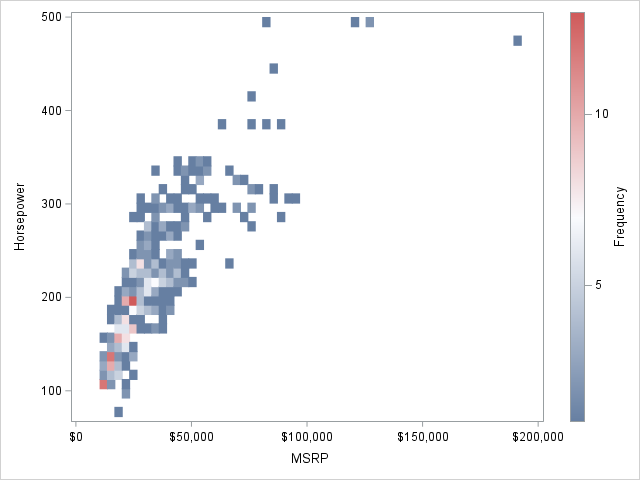

In [7]:
cars.heatmap('msrp','horsepower')

### Let's do the same on the other SASsession, just to show we're connected there too

In [8]:
cars2 = sas2.sasdata('cars', libref='sashelp')

In [9]:
cars2.head()  # Note the Pandas DataFrame output instead of HTML

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6,225,18,24,3880,115,197



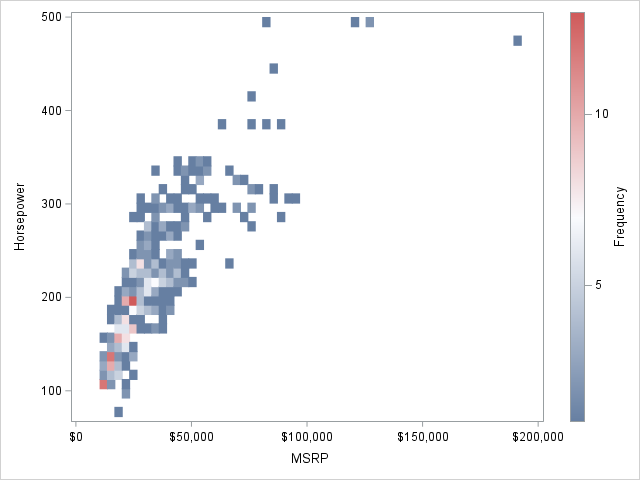

In [10]:
cars2.heatmap('msrp','horsepower')

## Now, Let's Explore the %%SAS Jupyter Magic which allows a Cell to process SAS code, Like the SAS_Kernel does

### First, let's get some SAS code. How about that Heatmap right above?

In [11]:
sas.teach_me_SAS(True)
cars.heatmap('msrp','horsepower')
sas.teach_me_SAS(False)

proc sgplot data=sashelp.cars ;
	heatmap x=msrp y=horsepower;;
run;
title;


Using SAS Config named: winlocal
SAS Connection established. Subprocess id is 27476




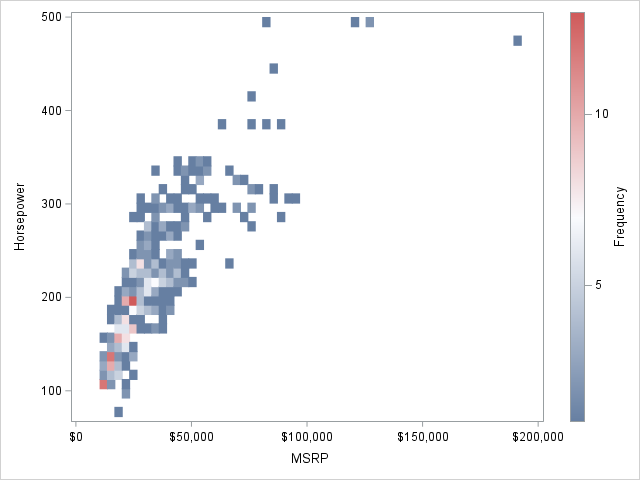

In [12]:
%%SAS
proc sgplot data=sashelp.cars ;
    heatmap x=msrp y=horsepower;;
run;


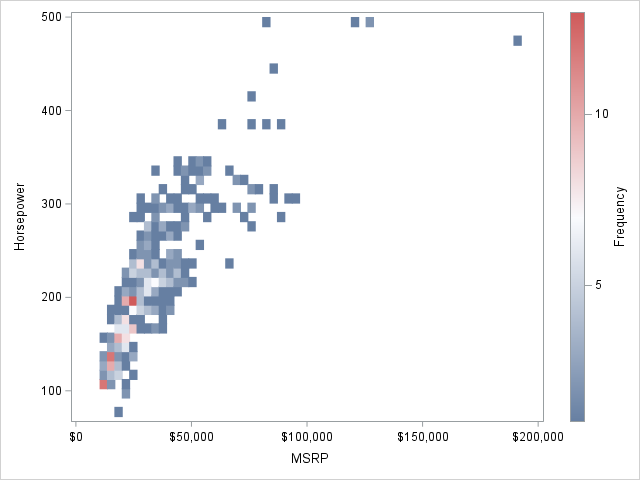

In [13]:
%%SAS sas
proc sgplot data=sashelp.cars ;
    heatmap x=msrp y=horsepower;;
run;

## So what is this %%SAS really doing?


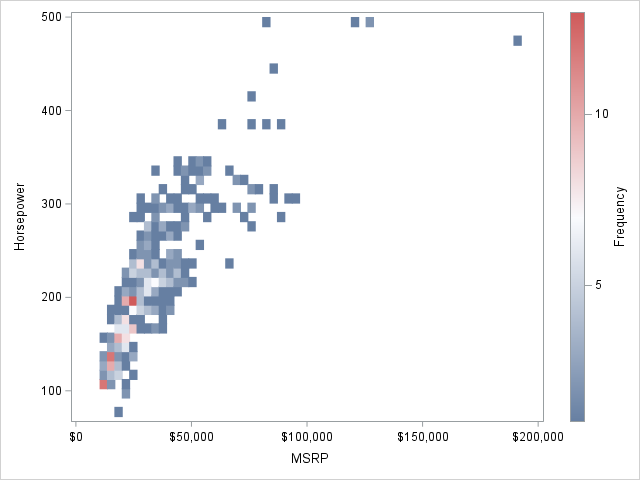

In [14]:
ll = sas.submit('''
proc sgplot data=sashelp.cars ;
    heatmap x=msrp y=horsepower;;
run;
''')
sas.HTML(ll['LST'])

In [15]:
print(ll['LOG'])

11                                                                                                                       The SAS System                                                                                            08:36 Tuesday, April 23, 2019

96         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue; ods graphics on / outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: _TOMODS1
97         
98         
99         proc sgplot data=sashelp.cars ;
100            heatmap x=msrp y=horsepower;;
101        run;

NOTE: PROCEDURE SGPLOT used (Total process time):
      real time           0.20 seconds
      cpu time            0.07 seconds
      
NOTE: There were 428 observations read from the data set SASHELP.CARS.

102        
103        
104        ods html5 (id=saspy_internal) close;ods listing;
105        


# Let's explore which SAS session each of these is really using
### In the Python Kernel SAS Sessions can be shared, or not, with the Magic. You control how you want it 
### In the SAS_Kernel, there is only one SAS Session for a notebook
#### No connections can be shared across Notebooks, as each Notbook is seperate OS Python process

In [16]:
for libref in sas.assigned_librefs():
    print(libref)

WORK
MAPS
SASHELP
MAPSSAS
MAPSGFK
SASUSER


## Let's assign librefs in eash session, then query them and see

In [17]:
sas.saslib('lib1', "'c:\\public\\saspy_demo\\lib1'")

13                                                                                                                       The SAS System                                                                                            08:36 Tuesday, April 23, 2019

126        
127        libname lib1 'c:\public\saspy_demo\lib1'  ;
NOTE: Libref LIB1 was successfully assigned as follows: 
      Engine:        V9 
      Physical Name: c:\public\saspy_demo\lib1
128        
129        


In [18]:
sas2.saslib('lib2', "'c:\\public\\saspy_demo\\lib2'")

13                                                                                                                       The SAS System                                                                                            08:36 Tuesday, April 23, 2019

124        
125        libname lib2 'c:\public\saspy_demo\lib2'  ;
NOTE: Libref LIB2 was successfully assigned as follows: 
      Engine:        V9 
      Physical Name: c:\public\saspy_demo\lib2
126        
127        


In [19]:
%%SAS
   libname libm 'c:\\public\\saspy_demo\\libm';

## Look in sas and sas2 and see they are different

In [20]:
for libref in sas.assigned_librefs():
    print(libref)

WORK
LIB1
MAPS
SASHELP
MAPSSAS
MAPSGFK
SASUSER


In [21]:
for libref in sas2.assigned_librefs():
    print(libref)

WORK
LIB2
SASHELP
MAPS
MAPSSAS
MAPSGFK
SASUSER


## Now ask saspy what SAS code to run to get that list and run it via the SAS Magic

In [22]:
sas.teach_me_SAS(True)
sas.assigned_librefs()
sas.teach_me_SAS(False)


        data _null_; retain libref; retain cobs 1; 
           set sashelp.vlibnam end=last;
           if cobs EQ 1 then
              put "LIBREFSSTART";
           cobs = 2;
           if libref NE libname then
              put "LIBREF=" libname;
           libref = libname;
           if last then
              put "LIBREFSEND";
        run;
        


In [23]:
%%SAS
        data _null_; retain libref; retain cobs 1; 
           set sashelp.vlibnam end=last;
           if cobs EQ 1 then
              put "LIBREFSSTART";
           cobs = 2;
           if libref NE libname then
              put "LIBREF=" libname;
           libref = libname;
           if last then
              put "LIBREFSEND";
        run;

In [24]:
%%SAS sas
        data _null_; retain libref; retain cobs 1; 
           set sashelp.vlibnam end=last;
           if cobs EQ 1 then
              put "LIBREFSSTART";
           cobs = 2;
           if libref NE libname then
              put "LIBREF=" libname;
           libref = libname;
           if last then
              put "LIBREFSEND";
        run;

In [25]:
%%SAS sas2
        data _null_; retain libref; retain cobs 1; 
           set sashelp.vlibnam end=last;
           if cobs EQ 1 then
              put "LIBREFSSTART";
           cobs = 2;
           if libref NE libname then
              put "LIBREF=" libname;
           libref = libname;
           if last then
              put "LIBREFSEND";
        run;

In [26]:
sas.HTML(sas.submit('proc sql;select distinct(libname) from sashelp.vlibnam; quit;')['LST'])

Library Name
LIB1
MAPS
MAPSGFK
MAPSSAS
SASHELP
SASUSER
WORK
